# Assignment 9 - Sentiment Analysis of Amazon Reviews

In [ ]:
import nltk

In [59]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('C:/Users/Dell/Downloads/K8 Reviews v0.2.csv')
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [5]:
# Data preprocessing
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# Tokenization using word_token or RegexpTokenizer

nltk.download('punkt')

words = []

for i in data['review']:
    words.append(word_tokenize(i))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [31]:
words

[['Good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['Worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'Battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'I',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.This',
  'is',
  'biggest',
  'lie',
  'from',
  'Amazon',
  '&',
  'Lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000MAH',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.Do',
  "n't",
  'know',
  'how',
  'Lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.Please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

In [7]:
# Removing the digits and punctuations

word_token = []
for i in data['review']:
    word_token.append(RegexpTokenizer('[a-z|A-Z]+').tokenize(i))

In [8]:
word_token

[['Good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['Worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  'Battery',
  'is',
  'draining',
  'like',
  'hell',
  'backup',
  'is',
  'only',
  'to',
  'hours',
  'with',
  'internet',
  'uses',
  'even',
  'if',
  'I',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged',
  'This',
  'is',
  'biggest',
  'lie',
  'from',
  'Amazon',
  'Lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  'MAH',
  'booster',
  'charger',
  'is',
  'fake',
  'it',
  'takes',
  'at',
  'least',
  'to',
  'hours',
  'to',
  'be',
  'fully',
  'charged',
  'Don',
  't',
  'know',
  'how',
  'Lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us',
  'Please',
  'don',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will',
  'regret',
  'like',
  'me'],
 ['when',
  'I',
  'will',
  'get',
  'm

In [9]:
len(word_token)

14675

In [10]:
# removing stop words
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
word_clean = []
for i in word_token:
    word_clean_row = []
    for j in i:
        if j not in stopwords.words("English"):
            word_clean_row.append(j)
    word_clean.append(word_clean_row)

In [13]:
word_clean

[['Good', 'need', 'updates', 'improvements'],
 ['Worst',
  'mobile',
  'bought',
  'ever',
  'Battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hours',
  'internet',
  'uses',
  'even',
  'I',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'This',
  'biggest',
  'lie',
  'Amazon',
  'Lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'MAH',
  'booster',
  'charger',
  'fake',
  'takes',
  'least',
  'hours',
  'fully',
  'charged',
  'Don',
  'know',
  'Lenovo',
  'survive',
  'making',
  'full',
  'us',
  'Please',
  'go',
  'else',
  'regret',
  'like'],
 ['I', 'get', 'cash', 'back', 'already', 'January'],
 ['Good'],
 ['The',
  'worst',
  'phone',
  'everThey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'Highly',
  'disappointing',
  'amazon'],
 ['Only',
  'I',
  'telling',
  'buyI',
  'totally',
  'disappointedPoor',
  'batteryPoor',
  'cameraWaste',
  'money'],
 ['Phone',
  'awesome'

In [15]:
# Converting the text to lower case

word_lower_row = []
word_lower = []
for i in word_clean:
    word_lower_row = []
    for j in i:
        word_lower_row.append(j.lower())
    word_lower.append(word_lower_row)

In [16]:
word_lower

[['good', 'need', 'updates', 'improvements'],
 ['worst',
  'mobile',
  'bought',
  'ever',
  'battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hours',
  'internet',
  'uses',
  'even',
  'i',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'this',
  'biggest',
  'lie',
  'amazon',
  'lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'mah',
  'booster',
  'charger',
  'fake',
  'takes',
  'least',
  'hours',
  'fully',
  'charged',
  'don',
  'know',
  'lenovo',
  'survive',
  'making',
  'full',
  'us',
  'please',
  'go',
  'else',
  'regret',
  'like'],
 ['i', 'get', 'cash', 'back', 'already', 'january'],
 ['good'],
 ['the',
  'worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['only',
  'i',
  'telling',
  'buyi',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['phone',
  'awesome'

In [17]:
# stemming

word_stem_row = []
word_stem = []
for i in word_lower:
    word_stem_row = []
    for j in i:
        word_stem_row.append(PorterStemmer().stem(j))
    word_stem.append(word_stem_row)

In [18]:
word_stem

[['good', 'need', 'updat', 'improv'],
 ['worst',
  'mobil',
  'bought',
  'ever',
  'batteri',
  'drain',
  'like',
  'hell',
  'backup',
  'hour',
  'internet',
  'use',
  'even',
  'i',
  'put',
  'mobil',
  'idl',
  'get',
  'discharg',
  'thi',
  'biggest',
  'lie',
  'amazon',
  'lenov',
  'expect',
  'make',
  'full',
  'say',
  'batteri',
  'mah',
  'booster',
  'charger',
  'fake',
  'take',
  'least',
  'hour',
  'fulli',
  'charg',
  'don',
  'know',
  'lenovo',
  'surviv',
  'make',
  'full',
  'us',
  'pleas',
  'go',
  'els',
  'regret',
  'like'],
 ['i', 'get', 'cash', 'back', 'alreadi', 'januari'],
 ['good'],
 ['the',
  'worst',
  'phone',
  'everthey',
  'chang',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'return',
  'phone',
  'highli',
  'disappoint',
  'amazon'],
 ['onli',
  'i',
  'tell',
  'buyi',
  'total',
  'disappointedpoor',
  'batterypoor',
  'camerawast',
  'money'],
 ['phone',
  'awesom',
  'but',
  'charg',
  'heat',
  'allot',
  'realli',


In [20]:
# Lemmatization (use instead of stemming)
nltk.download('wordnet')


word_lemma_row = []
word_lemma = []
for i in word_lower:
    word_lemma_row = []
    for j in i:
        word_lemma_row.append(WordNetLemmatizer().lemmatize(j))
    word_lemma.append(word_lemma_row)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [24]:
word_lemma

[['good', 'need', 'update', 'improvement'],
 ['worst',
  'mobile',
  'bought',
  'ever',
  'battery',
  'draining',
  'like',
  'hell',
  'backup',
  'hour',
  'internet',
  'us',
  'even',
  'i',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged',
  'this',
  'biggest',
  'lie',
  'amazon',
  'lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  'mah',
  'booster',
  'charger',
  'fake',
  'take',
  'least',
  'hour',
  'fully',
  'charged',
  'don',
  'know',
  'lenovo',
  'survive',
  'making',
  'full',
  'u',
  'please',
  'go',
  'else',
  'regret',
  'like'],
 ['i', 'get', 'cash', 'back', 'already', 'january'],
 ['good'],
 ['the',
  'worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  'highly',
  'disappointing',
  'amazon'],
 ['only',
  'i',
  'telling',
  'buyi',
  'totally',
  'disappointedpoor',
  'batterypoor',
  'camerawaste',
  'money'],
 ['phone',
  'awesome',
  'but

In [25]:
# Apply pos tagging

nltk.download('averaged_perceptron_tagger')


word_tag_row = []
word_tag = []
for i in word_lemma:
    word_tag.append(nltk.pos_tag(i))
    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
word_tag

[[('good', 'JJ'), ('need', 'NN'), ('update', 'JJ'), ('improvement', 'NN')],
 [('worst', 'RB'),
  ('mobile', 'NN'),
  ('bought', 'VBD'),
  ('ever', 'RB'),
  ('battery', 'RB'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  ('backup', 'IN'),
  ('hour', 'NN'),
  ('internet', 'NN'),
  ('us', 'PRP'),
  ('even', 'RB'),
  ('i', 'VBP'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'JJ'),
  ('getting', 'VBG'),
  ('discharged', 'VBN'),
  ('this', 'DT'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('expected', 'VBD'),
  ('making', 'VBG'),
  ('full', 'JJ'),
  ('saying', 'VBG'),
  ('battery', 'NN'),
  ('mah', 'NN'),
  ('booster', 'NN'),
  ('charger', 'NN'),
  ('fake', 'VBP'),
  ('take', 'VB'),
  ('least', 'JJS'),
  ('hour', 'NN'),
  ('fully', 'RB'),
  ('charged', 'VBN'),
  ('don', 'NN'),
  ('know', 'VBP'),
  ('lenovo', 'JJ'),
  ('survive', 'JJ'),
  ('making', 'VBG'),
  ('full', 'JJ'),
  ('u', 'JJ'),
  ('please', 'NN'),
  ('go', 'VB'),
  ('else'

In [35]:
# for understanding the context, filter the nouns


filtered_tag = []
for i in word_tag:
    filtered_row = []
    for j in i:
        if j[1].startswith('NN'):
            filtered_row.append(j[0])
    filtered_tag.append(filtered_row)

In [36]:
filtered_tag

[['need', 'improvement'],
 ['mobile',
  'hell',
  'hour',
  'internet',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'mah',
  'booster',
  'charger',
  'hour',
  'don',
  'please',
  'regret'],
 ['cash'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'phone', 'amazon'],
 ['i', 'buyi', 'batterypoor', 'camerawaste', 'money'],
 ['phone',
  'awesome',
  'heat',
  'allot',
  'reason',
  'hate',
  'lenovo',
  'k',
  'note'],
 ['battery', 'level', 'worn'],
 ['problem',
  'phone',
  'problem',
  'lenovo',
  'k',
  'note',
  'service',
  'station',
  'year',
  'warranty',
  'change',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'dont', 'thing', 'option'],
 ['wrost'],
 ['phone', 'charger', 'damage', 'month'],
 ['purchase', 'item', 'heating', 'battery', 'life'],
 ['i', 'battery', 'problem', 'motherboard', 'problem', 'month', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen', 'love'],
 ['headset'],
 ['time'],
 ['product',
  'range',
  'specification',
  'comparison',
  'range',
  'i',
  

In [37]:
# Generating a word cloud 

words = []
for i in filtered_tag:
    for j in i:
        words.append(j)

In [38]:
words

['need',
 'improvement',
 'mobile',
 'hell',
 'hour',
 'internet',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'mah',
 'booster',
 'charger',
 'hour',
 'don',
 'please',
 'regret',
 'cash',
 'phone',
 'everthey',
 'phone',
 'problem',
 'phone',
 'amazon',
 'i',
 'buyi',
 'batterypoor',
 'camerawaste',
 'money',
 'phone',
 'awesome',
 'heat',
 'allot',
 'reason',
 'hate',
 'lenovo',
 'k',
 'note',
 'battery',
 'level',
 'worn',
 'problem',
 'phone',
 'problem',
 'lenovo',
 'k',
 'note',
 'service',
 'station',
 'year',
 'warranty',
 'change',
 'phone',
 'lenovo',
 'lot',
 'glitch',
 'dont',
 'thing',
 'option',
 'wrost',
 'phone',
 'charger',
 'damage',
 'month',
 'purchase',
 'item',
 'heating',
 'battery',
 'life',
 'i',
 'battery',
 'problem',
 'motherboard',
 'problem',
 'month',
 'life',
 'phone',
 'slim',
 'battry',
 'backup',
 'screen',
 'love',
 'headset',
 'time',
 'product',
 'range',
 'specification',
 'comparison',
 'range',
 'i',
 'phone',
 'amazon',
 'seal',
 'i',
 'i',
 'c

In [39]:
# Convert to string format

word_str = ','.join(words)
word_str

'need,improvement,mobile,hell,hour,internet,lie,amazon,lenove,battery,mah,booster,charger,hour,don,please,regret,cash,phone,everthey,phone,problem,phone,amazon,i,buyi,batterypoor,camerawaste,money,phone,awesome,heat,allot,reason,hate,lenovo,k,note,battery,level,worn,problem,phone,problem,lenovo,k,note,service,station,year,warranty,change,phone,lenovo,lot,glitch,dont,thing,option,wrost,phone,charger,damage,month,purchase,item,heating,battery,life,i,battery,problem,motherboard,problem,month,life,phone,slim,battry,backup,screen,love,headset,time,product,range,specification,comparison,range,i,phone,amazon,seal,i,i,credit,card,i,r,deal,amazon,battery,i,solution,battery,life,smartphone,galery,problem,atmos,speaker,phone,camera,speed,feature,excelent,battery,product,product,camera,battery,phone,product,lenovo,option,cast,screen,call,option,doesn,hotspot,phone,usb,cable,phone,price,lenovo,display,specification,function,phone,i,fon,i,speekars,i,phone,issue,color,screen,oreo,battery,heating,prob

In [43]:
wordcloud = WordCloud(background_color = 'black', max_words = 10000, contour_width = 3, contour_color = 'steelblue')

In [45]:
wc = wordcloud.generate(word_str)

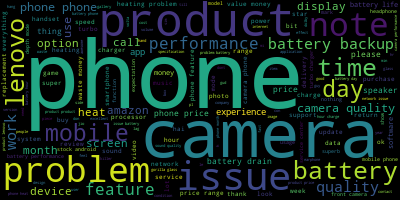

<Figure size 3600x3600 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50,50))
wc.to_image()


In [51]:
# Change format for COuntVectorizer

str_list = []
for i in filtered_tag:
   str_list.append(','.join(i)) 

In [52]:
str_list

['need,improvement',
 'mobile,hell,hour,internet,lie,amazon,lenove,battery,mah,booster,charger,hour,don,please,regret',
 'cash',
 '',
 'phone,everthey,phone,problem,phone,amazon',
 'i,buyi,batterypoor,camerawaste,money',
 'phone,awesome,heat,allot,reason,hate,lenovo,k,note',
 'battery,level,worn',
 'problem,phone,problem,lenovo,k,note,service,station,year,warranty,change,phone,lenovo',
 'lot,glitch,dont,thing,option',
 'wrost',
 'phone,charger,damage,month',
 'purchase,item,heating,battery,life',
 'i,battery,problem,motherboard,problem,month,life',
 'phone,slim,battry,backup,screen,love',
 'headset',
 'time',
 'product,range,specification,comparison,range,i,phone,amazon,seal,i,i,credit,card,i,r,deal,amazon',
 'battery,i,solution,battery,life',
 'smartphone',
 '',
 'galery,problem,atmos,speaker,phone',
 'camera,speed,feature,excelent,battery',
 'product',
 'product,camera,battery,phone,product,lenovo',
 'option,cast,screen,call,option,doesn,hotspot',
 'phone,usb,cable',
 'phone,price,le

In [53]:
v1 = CountVectorizer().fit(str_list)

In [55]:
v1.get_feature_names()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aab',
 'aachha',
 'aaj',
 'aajata',
 'aal',
 'aap',
 'aapka',
 'aapki',
 'aapko',
 'aapne',
 'aaps',
 'aapse',
 'aashiyana',
 'aata',
 'aate',
 'aati',
 'aavashyakta',
 'aavdla',
 'aay',
 'aaya',
 'aaye',
 'aayega',
 'aayi',
 'ab',
 'abb',
 'abbt',
 'abeauty',
 'abhi',
 'abhitak',
 'ability',
 'ablebal',
 'abscent',
 'absence',
 'absent',
 'absentplease',
 'absolute',
 'abt',
 'ac',
 'acc',
 'accept',
 'acceptance',
 'accepts',
 'acceserie',
 'accesorios',
 'access',
 'accessory',
 'accha',
 'acchaa',
 'accidental',
 'account',
 'accuracy',
 'accurate',
 'acessories',
 'acha',
 'achaa',
 'achcha',
 'achchha',
 'ache',
 'achha',
 'acknowledge',
 'acoumnt',
 'act',
 'action',
 'activate',
 'activity',
 'ad',
 'adagond',
 'adapter',
 'adaptor',
 'add',
 'addition',
 'address',
 'adequate',
 'adichaalum',
 'adjust',
 'adjusting',
 'adjustment',
 'adobe',
 'adopter',
 'adreno',
 'advance',
 'advantage',
 'advertisement',
 'advertising',
 'advice',
 'adviceregardsmangesh',
 'advise'

In [56]:
v2 = v1.transform(str_list)

In [58]:
v2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(v2, data['sentiment'])

In [61]:
# Applying NB

nb_mod = MultinomialNB().fit(x_tr,y_tr)

In [62]:
pred = nb_mod.predict(x_test)
pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.717361678931589